In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import warnings

from sklearn.svm import SVC, SVR
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_gaussian_quantiles
from sklearn.metrics import f1_score,precision_score,recall_score,accuracy_score
from mpl_toolkits.mplot3d import Axes3D

warnings.filterwarnings(action='ignore') 

## SVC

#### 함수 정의

In [1]:
# Classfication 결과 출력 함수
def metric(model, test_X, test_y):
    preds = model.predict(test_X)
    acc = accuracy_score(test_y,preds)
    f1 = f1_score(test_y,preds,average='macro')
    precision = precision_score(test_y,preds,average='macro')
    recall  = recall_score(test_y,preds,average='macro')
    return [acc,precision,recall,f1]

In [3]:
# Kernel 변경에 따른 SVM 모델 수립
def fit_kernel_svm(X,y):
    kernels = ['linear','poly','rbf','sigmoid']
    kernel_svms = []
    times = []

    for kernel in kernels:
        start_time = time.time() # 모델 수립에 소요되는 시간 측정을 위함
        globals()['{}_clf'.format(kernel)] = SVC(kernel = kernel).fit(X,y) # 'linear_clf', 'poly_clf'와 같이 각기 다른 커널을 사용한 SVC 모델 객체를 변수로 저장
        times.append(time.time()-start_time)
        kernel_svms.append(globals()['{}_clf'.format(kernel)])
    
    return kernel_svms,times, kernels

In [4]:
def svc_plot(X,y, svm_model):
    assert X.shape[1] == 2, "input X's Num of Feature should be 2" # 2차원 시각화를 위해 Input X의 변수 개수가 2개인 경우만 허용
    plt.title(f'{svm_model} Scatter Plot')
    plt.scatter(X[:,0],X[:,1], marker = 'o', c = y, cmap = plt.cm.Paired, edgecolors= 'k') # Data Instance 시각화

    # 초평면 시각화
    ax = plt.gca()    
    xlim, ylim = ax.get_xlim(), ax.get_ylim()
    xx = np.linspace(xlim[0],xlim[1], 10)
    yy = np.linspace(ylim[0],ylim[1], 10)
    XX, YY = np.meshgrid(xx, yy)

    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    z = svm_model.decision_function(xy).reshape(XX.shape) # 분류 경계면 (Hyperplane)
    ax.contour(XX, YY, z, colors = ['k','r','k'], levels = [-1, 0, 1], alpha = 0.6, linestyles = ['--','-','--'])
    
    return plt.show()

In [5]:
def show_kernel_svc_result(X, y):
    train_X, test_X, train_y, test_y = train_test_split(X, y, shuffle = True, test_size = 0.25)
    kernel_svms, times, kernels = fit_kernel_svm(train_X, train_y)
    k_svms, acc, precision, recall, f1 = [], [], [], [], [] # Kernel 별 성능을 DataFrame 형태로 보여주기 위해 빈 리스트 생성

    for i, k_s in enumerate(kernel_svms):
        k_svms.append(kernels[i]) # kernels[i] 예시: 'linear' (str)
        acc.append(metric(k_s,test_X,test_y)[0]) # Classifier의 Accuracy 
        precision.append(metric(k_s,test_X,test_y)[1]) # Classifier의 Precision
        recall.append(metric(k_s,test_X,test_y)[2]) # Classifier의 Recall
        f1.append(metric(k_s,test_X,test_y)[3]) # Classifier의 F1 score

    # 각 커널별 SVC의 분류 성능 및 모델 수립에 소요된 시간을 데이터 프레임 형태로 저장
    k_svm_result = pd.DataFrame({'Kernel':k_svms, 'Accuracy':acc, 'Precision':precision, 'Recall':recall, 'F1 Score':f1, 'Time for Train(s)': times})
    k_svm_result.iloc[:,1:] = k_svm_result.iloc[:,1:].apply(lambda x:np.round(x,4))
    
    # Kernel 별 F1 Score 및 모델 수립 소요 시간 시각화
    fig, axes = plt.subplots(ncols = 2)
    fig.set_size_inches((8,5))
    fig.subplots_adjust(wspace = 0.3)

    axes[0].plot(k_svm_result['Kernel'], k_svm_result['F1 Score'], marker = 'o', color = 'blue')
    axes[0].set_title('F1 Score')
    axes[1].plot(k_svm_result['Kernel'], k_svm_result['Time for Train(s)'], marker = 'o', color = 'red')
    axes[1].set_title('Time for Train(s)')

    display(k_svm_result)
    plt.show()

#### make_moons datasets
- Linear Classificatiion으로 분류 불가능한 데이터셋

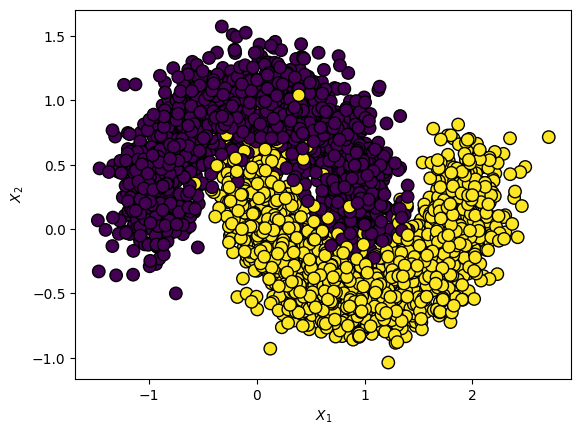

In [6]:
# 데이터셋 이해를 위한 Moon datasets 시각화
X,y = make_moons(n_samples = 3000, noise = 0.2, random_state = 1002)
plt.scatter(X[:,0],X[:,1], marker = "o", c = y, s = 80, edgecolor = 'k', linewidth = 1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

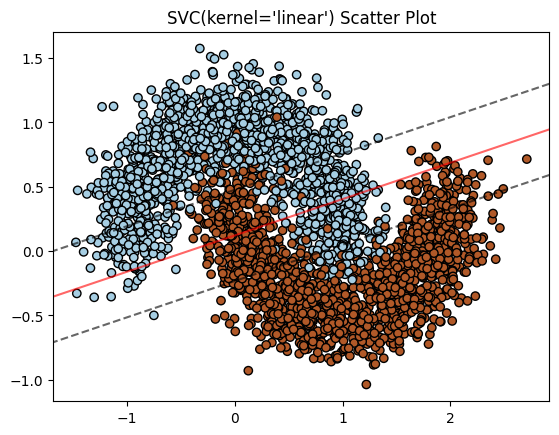

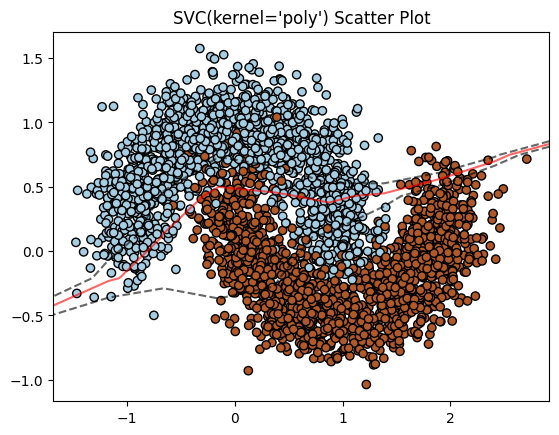

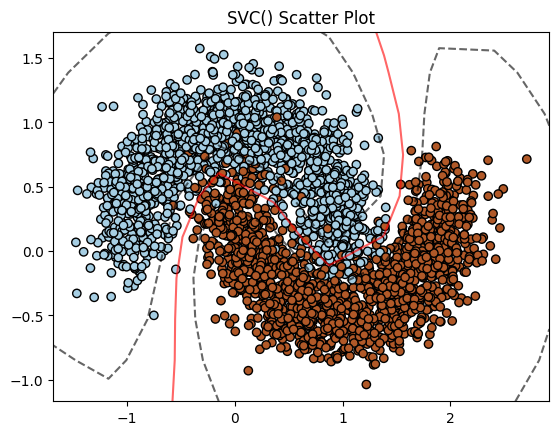

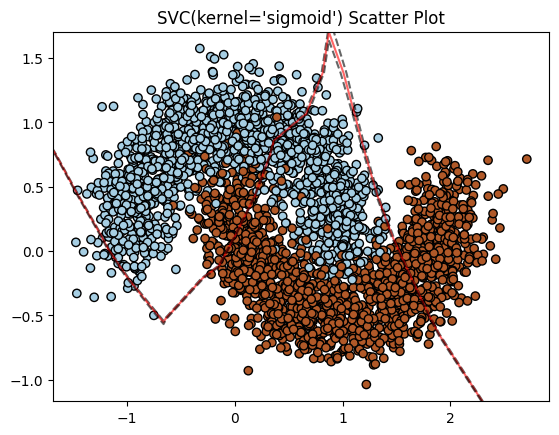

In [7]:
# 각 Kernel 별 결과 이해를 돕기 위한 시각화 예시
# 그림에서 빨간선이 수립된 Hyperplane(분류 경계면), 점선은 분류 경계면 수식에서 각각 +1/-1한 것
kernel_svms, times, kernels = fit_kernel_svm(X, y)

for k_s in kernel_svms:
    svc_plot(X,y,k_s)

,Kernel,Accuracy,Precision,Recall,F1 Score,Time for Train(s)
0,linear,0.8728,0.8728,0.8728,0.8728,0.0556
1,poly,0.9008,0.9084,0.8998,0.9002,0.0584
2,rbf,0.9752,0.9752,0.9752,0.9752,0.0204
3,sigmoid,0.6184,0.6183,0.6183,0.6183,0.0935


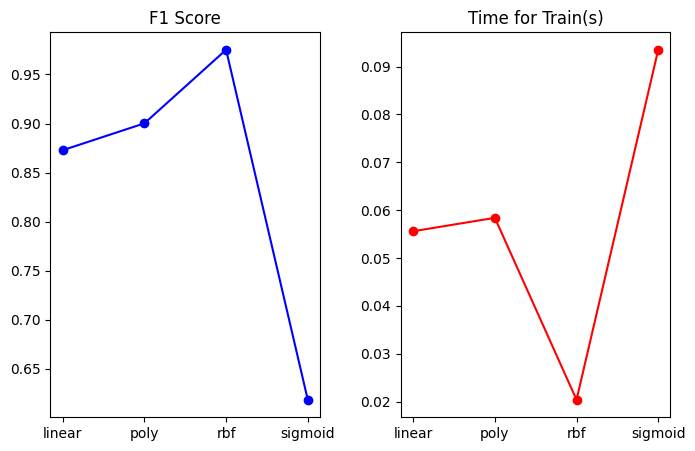

In [8]:
# Moon Dataset 적용 결과 확인
X, y = make_moons(n_samples = 5000, noise = 0.2, random_state = 1002)
show_kernel_svc_result(X,y)

#### make_gaussian_quantiles
- 등고선 형태의 데이터셋, 타원형 형태의 분류 경계선을 통해 분류 가능

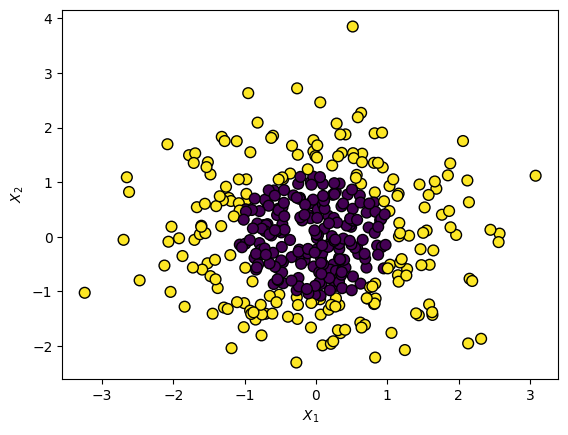

In [9]:
# Gaussian Quantile datasets
X,y = make_gaussian_quantiles(n_samples = 400, n_features = 2, n_classes = 2, random_state = 42) 
plt.scatter(X[:,0],X[:,1], marker = 'o', c = y, s = 60, edgecolor = 'k', linewidth = 1)
plt.xlabel("$X_1$")
plt.ylabel("$X_2$")
plt.show()

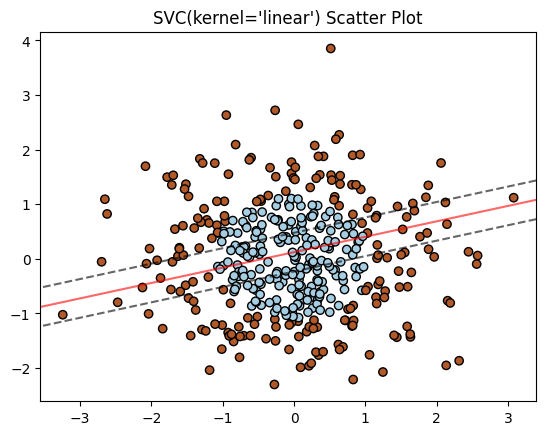

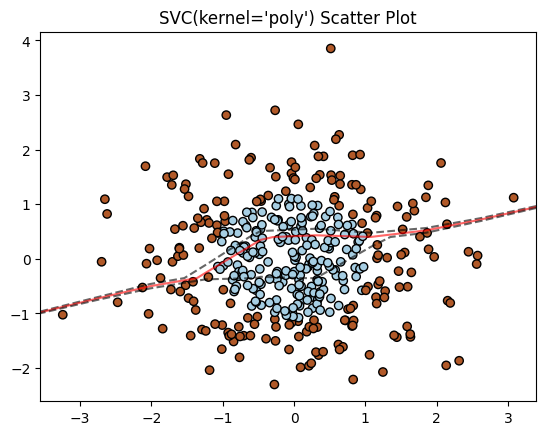

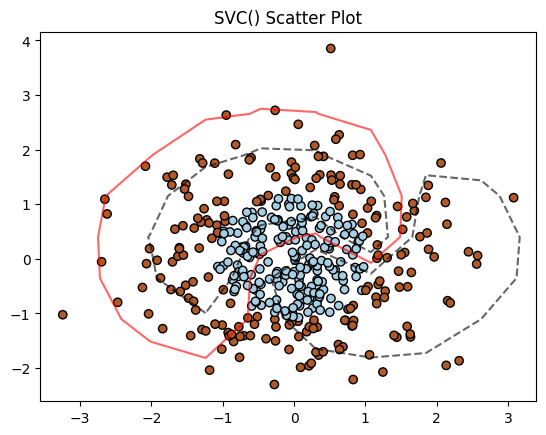

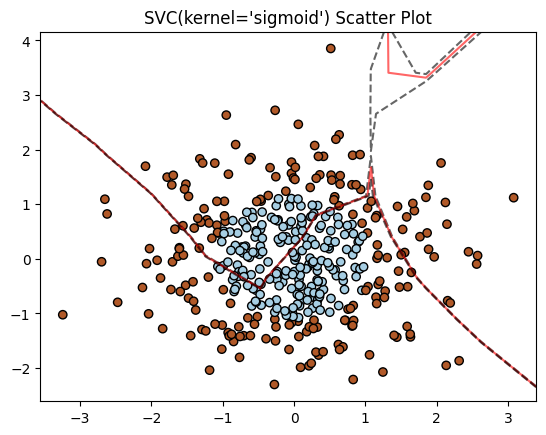

In [10]:
for k_s in kernel_svms:
    svc_plot(X,y,k_s)

,Kernel,Accuracy,Precision,Recall,F1 Score,Time for Train(s)
0,linear,0.5872,0.6277,0.5872,0.5516,0.1590
1,poly,0.5144,0.7537,0.5144,0.3646,0.3005
2,rbf,0.9960,0.9960,0.9960,0.9960,0.0209
3,sigmoid,0.5328,0.5328,0.5328,0.5328,0.1886


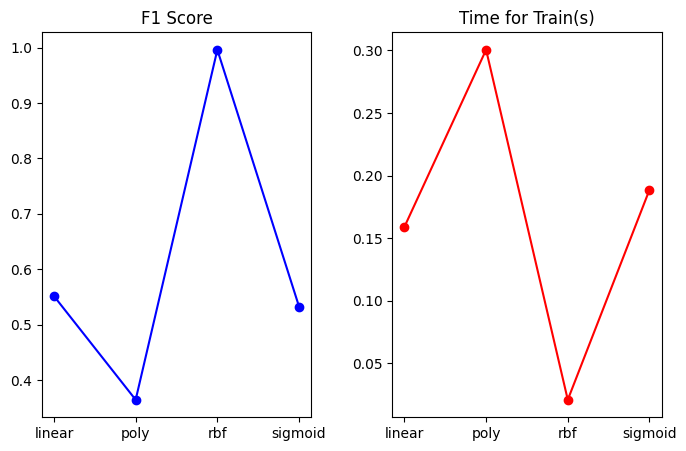

In [11]:
# Gaussian Quantiles 데이터셋 적용 결과 확인
X, y = make_gaussian_quantiles(n_samples = 5000, n_features = 2, n_classes = 2, random_state = 42)
show_kernel_svc_result(X,y)

#### 독립 변수 개수 변경에 따른 커널별 학습 소요 시간 체크

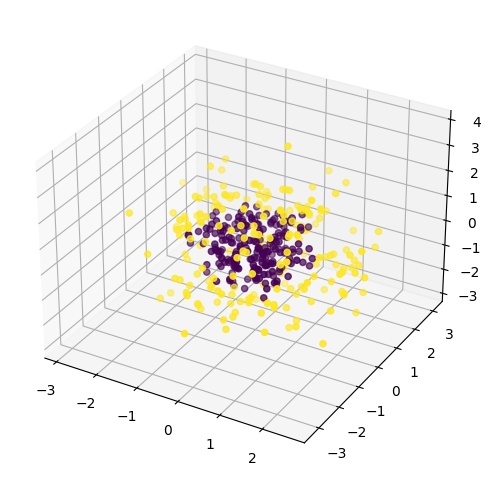

In [12]:
# 독립 변수 3개인 경우 시각화
X,y = make_gaussian_quantiles(n_samples = 400, n_features = 3, n_classes = 2, random_state = 42)  

fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c = y, marker = 'o')

독립 변수 개수: 3


,Kernel,Accuracy,Precision,Recall,F1 Score,Time for Train(s)
0,linear,0.4864,0.2432,0.5000,0.3272,0.1938
1,poly,0.5152,0.7504,0.5280,0.3868,0.2636
2,rbf,0.9904,0.9908,0.9901,0.9904,0.0305
3,sigmoid,0.5432,0.5441,0.5440,0.5431,0.1710


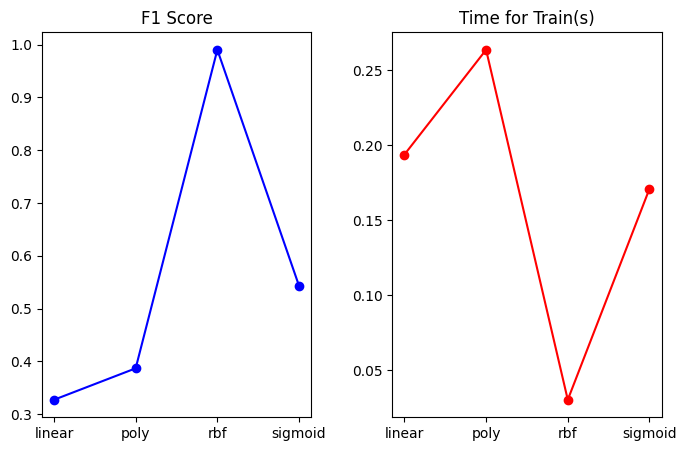

독립 변수 개수: 6


,Kernel,Accuracy,Precision,Recall,F1 Score,Time for Train(s)
0,linear,0.4696,0.2348,0.5000,0.3195,0.1721
1,poly,0.6344,0.7287,0.6132,0.5702,0.1976
2,rbf,0.9784,0.9782,0.9785,0.9783,0.0457
3,sigmoid,0.5288,0.5261,0.5259,0.5258,0.2552


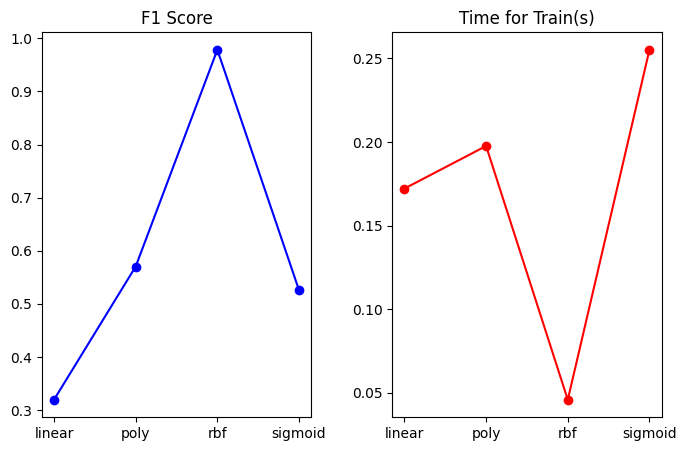

독립 변수 개수: 12


,Kernel,Accuracy,Precision,Recall,F1 Score,Time for Train(s)
0,linear,0.5200,0.5191,0.5190,0.5188,0.3756
1,poly,0.6144,0.6507,0.6067,0.5804,0.1950
2,rbf,0.9736,0.9735,0.9738,0.9736,0.0577
3,sigmoid,0.5456,0.5446,0.5425,0.5384,0.3375


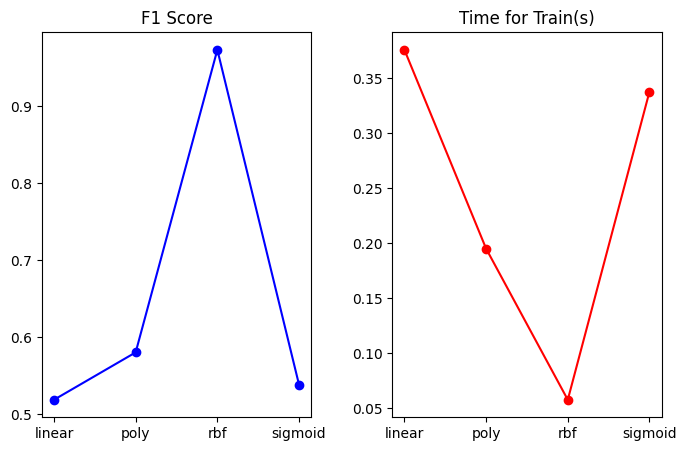

독립 변수 개수: 24


,Kernel,Accuracy,Precision,Recall,F1 Score,Time for Train(s)
0,linear,0.5152,0.5147,0.5142,0.5108,0.5206
1,poly,0.6056,0.6342,0.6029,0.5799,0.2623
2,rbf,0.9584,0.9589,0.9582,0.9584,0.0976
3,sigmoid,0.5320,0.5321,0.5309,0.5271,0.4676


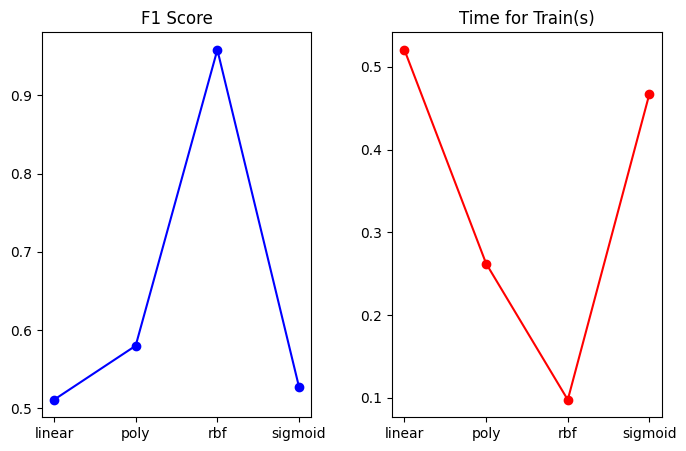

독립 변수 개수: 48


,Kernel,Accuracy,Precision,Recall,F1 Score,Time for Train(s)
0,linear,0.5144,0.5134,0.5134,0.5133,0.8963
1,poly,0.5712,0.6092,0.5588,0.5080,0.3691
2,rbf,0.9576,0.9574,0.9577,0.9576,0.1760
3,sigmoid,0.5120,0.5119,0.5119,0.5118,0.5665


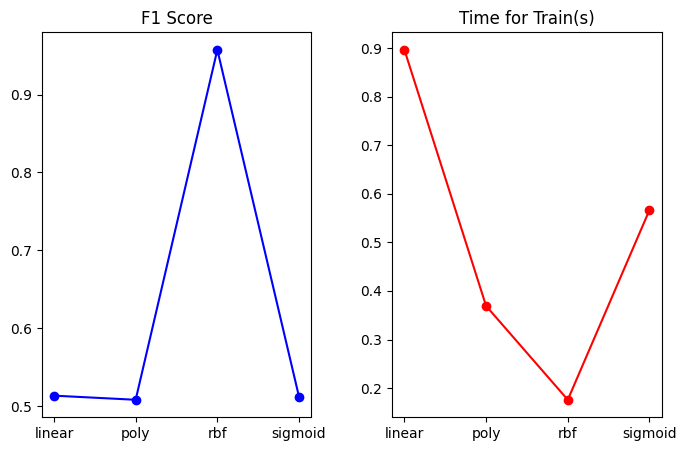

In [13]:
n_features = [3, 6, 12, 24, 48]
for n_feature in n_features:
    X, y = make_gaussian_quantiles(n_samples = 5000, n_features = n_feature, n_classes = 2, random_state = 42)
    train_X, test_X, train_y, test_y = train_test_split(X,y, shuffle = True, test_size = 0.25)
    kernel_svms, times, kernels = fit_kernel_svm(train_X, train_y)
    k_svms, acc, precision, recall, f1 = [], [], [], [], []

    for i, k_s in enumerate(kernel_svms):
        k_svms.append(kernels[i])
        acc.append(metric(k_s,test_X,test_y)[0])
        precision.append(metric(k_s,test_X,test_y)[1])
        recall.append(metric(k_s,test_X,test_y)[2])
        f1.append(metric(k_s,test_X,test_y)[3])

    k_svm_result = pd.DataFrame({'Kernel':k_svms, 'Accuracy':acc, 'Precision':precision, 'Recall':recall, 'F1 Score':f1, 'Time for Train(s)': times})
    k_svm_result.iloc[:,1:] = k_svm_result.iloc[:,1:].apply(lambda x:np.round(x,4))
        
    fig, axes = plt.subplots(ncols = 2)
    fig.set_size_inches((8,5))
    fig.subplots_adjust(wspace = 0.3)

    # plt.plot(k_svm_result['Kernel'], k_svm_result['Accuracy'])
    axes[0].plot(k_svm_result['Kernel'], k_svm_result['F1 Score'], marker = 'o', color = 'blue')
    axes[0].set_title('F1 Score')
    axes[1].plot(k_svm_result['Kernel'], k_svm_result['Time for Train(s)'], marker = 'o', color = 'red')
    axes[1].set_title('Time for Train(s)')

    print(f'독립 변수 개수: {n_feature}')
    display(k_svm_result)
    plt.show()

##### 독립 변수 개수 증가하면서 linear, poly, rbf, sigmoid 각각 Train Time이 얼마나 걸리는지 변화(plot 그래프 그리기) x축 독립변수 개수, y축 Train Time (Instance 개수는 동일)

In [14]:
# 독립 변수 개수와 Kernel을 입력으로 받아 모델 수립에 소요되는 시간을 반환하는 함수
def time_kernel_n_feature(n_feature: int, kernel: str):
    assert kernel in ['linear','poly','rbf','sigmoid'], 'Kernel candidates: linear, poly, rbf, sigmoid'
    X, y = make_gaussian_quantiles(n_samples = 5000, n_features = n_feature, n_classes = 2, random_state = 42)
    train_X, test_X, train_y, test_y = train_test_split(X,y, shuffle = True, test_size = 0.25)
    start_time = time.time()
    svc = SVC(kernel = kernel) # kernel 값 argument로
    svc.fit(train_X, train_y)
    end_time = time.time()
    train_time = end_time - start_time
    return train_time

In [38]:
kernel_candidates = ['linear','poly','rbf','sigmoid']
n_features = np.arange(1,100+1)

for kernel in kernel_candidates:
    globals()['{}_times'.format(kernel)] = []

    for n_feature in n_features:
        train_time = time_kernel_n_feature(n_feature, kernel = 'linear')
        globals()['{}_times'.format(kernel)].append(train_time)

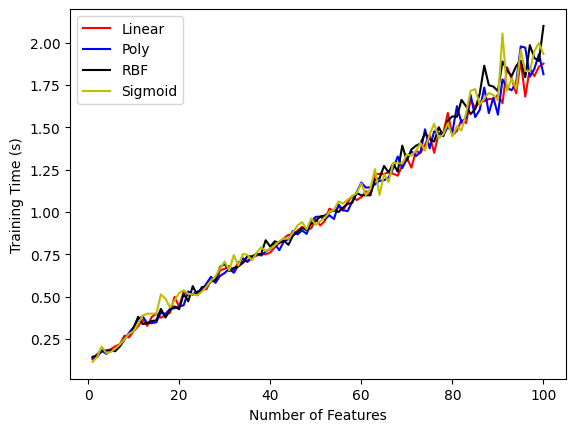

In [39]:
plt.plot(n_features, linear_times, c = 'red')
plt.plot(n_features, poly_times, c = 'b')
plt.plot(n_features, rbf_times, c = 'k')
plt.plot(n_features, sigmoid_times, c = 'y')

plt.xlabel("Number of Features")
plt.ylabel("Training Time (s)")

plt.legend(['Linear', 'Poly','RBF','Sigmoid'])

In [59]:
# linear_times, poly_times, rbf_times, sigmoid_times 네 가지 list를 concat해서 argmax해서 각 N_feature별로 어떤 커널이 가장 많이 시간이 걸렸는지 확인
times_df = pd.DataFrame({'Linear':linear_times, 'Poly':poly_times, 'RBF':rbf_times,'Sigmoid':sigmoid_times})

print("독립 변수 개수를 변화시킬 때, 각 Kernel Function 별 Max 값인 Case Count")
display(times_df.idxmax(axis = 1).value_counts())
print("독립 변수 개수를 변화시킬 때, 각 Kernel Function 별 Min 값인 Case Count")
display(times_df.idxmin(axis = 1).value_counts())

,Linear,Poly,RBF,Sigmoid
0,0.130019,0.137043,0.143490,0.113665
1,0.158875,0.141477,0.153311,0.142490
2,0.186506,0.181335,0.174152,0.204459
3,0.178771,0.161515,0.181676,0.166997
4,0.188910,0.182064,0.179220,0.172294
...,...,...,...,...
95,1.680167,1.970117,1.794804,1.831669
96,1.846755,1.797682,1.984481,1.830765
97,1.801438,1.844706,1.908757,1.950712
98,1.857069,1.932123,1.890725,1.996320


독립 변수 개수를 변화시킬 때, 각 Kernel Function 별 Max 값인 Case Count


Sigmoid    39
RBF        29
Poly       17
Linear     15
dtype: int64

독립 변수 개수를 변화시킬 때, 각 Kernel Function 별 Min 값인 Case Count


Poly       35
Linear     33
RBF        20
Sigmoid    12
dtype: int64

### SVR에서 커널&독립 변수 개수 변화하면서 모델 수립 시간 체크

In [6]:
from sklearn.datasets import make_regression

In [7]:
# 독립 변수 개수와 Kernel을 입력으로 받아 모델 수립에 소요되는 시간을 반환하는 함수
def time_kernel_n_feature_svr(n_feature: int, kernel: str):
    assert kernel in ['linear','poly','rbf','sigmoid'], 'Kernel candidates: linear, poly, rbf, sigmoid'
    X, y = make_regression(n_samples = 5000, n_features = n_feature)
    train_X, test_X, train_y, test_y = train_test_split(X,y, shuffle = True, test_size = 0.25, random_state= 1002)
    start_time = time.time()
    svr = SVR(kernel = kernel) # kernel 값 argument로
    svr.fit(train_X, train_y)
    end_time = time.time()
    train_time = end_time - start_time
    return train_time

In [11]:
kernel_candidates = ['linear','poly','rbf','sigmoid']
n_features = np.arange(1,100+1)

for kernel in kernel_candidates:
    globals()['{}_times_svr'.format(kernel)] = []

    for n_feature in n_features:
        train_time = time_kernel_n_feature_svr(n_feature, kernel = 'linear')
        globals()['{}_times_svr'.format(kernel)].append(train_time)

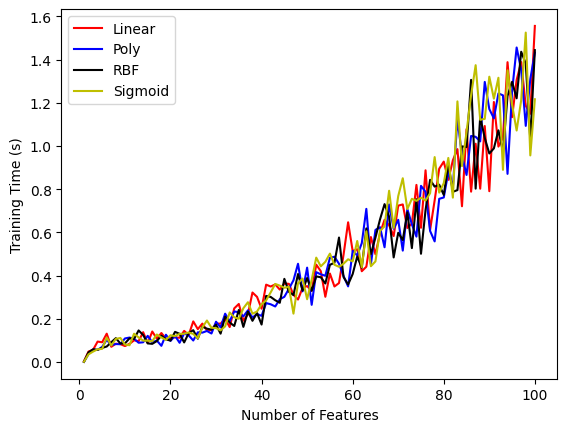

In [12]:
plt.plot(n_features, linear_times_svr, c = 'red')
plt.plot(n_features, poly_times_svr, c = 'b')
plt.plot(n_features, rbf_times_svr, c = 'k')
plt.plot(n_features, sigmoid_times_svr, c = 'y')

plt.xlabel("Number of Features")
plt.ylabel("Training Time (s)")

plt.legend(['Linear', 'Poly','RBF','Sigmoid'])

In [13]:
times_df_svr = pd.DataFrame({'Linear':linear_times_svr, 'Poly':poly_times_svr, 'RBF':rbf_times_svr,'Sigmoid':sigmoid_times_svr})

display(times_df_svr)
print("독립 변수 개수를 변화시킬 때, 각 Kernel Function 별 Max 값인 Case Count")
display(times_df_svr.idxmax(axis = 1).value_counts())
print("독립 변수 개수를 변화시킬 때, 각 Kernel Function 별 Min 값인 Case Count")
display(times_df_svr.idxmin(axis = 1).value_counts())

,Linear,Poly,RBF,Sigmoid
0,0.003601,0.000529,0.001270,0.001160
1,0.048593,0.036895,0.044953,0.035618
2,0.056593,0.057456,0.058919,0.048333
3,0.094659,0.056065,0.056467,0.058824
4,0.091531,0.070188,0.065495,0.060986
...,...,...,...,...
95,1.305836,1.455953,1.220757,1.071767
96,1.388707,1.351906,1.436366,1.211800
97,1.186238,1.093203,1.382327,1.524998
98,1.149194,1.309223,1.028115,0.956446


독립 변수 개수를 변화시킬 때, 각 Kernel Function 별 Max 값인 Case Count


Sigmoid    34
Linear     31
Poly       19
RBF        16
dtype: int64

독립 변수 개수를 변화시킬 때, 각 Kernel Function 별 Min 값인 Case Count


Poly       32
RBF        27
Linear     23
Sigmoid    18
dtype: int64